In [2]:
df=pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\diabetes.csv")

In [25]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


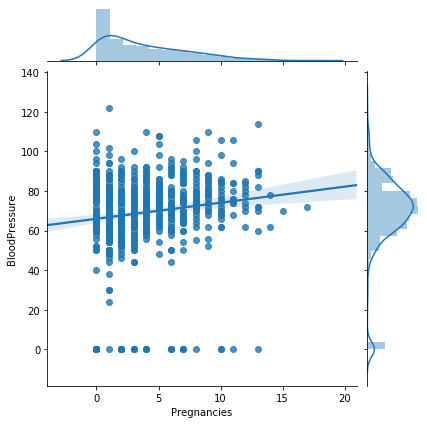

In [4]:
sns.jointplot(x="Pregnancies",y="BloodPressure",data=df,kind="reg")

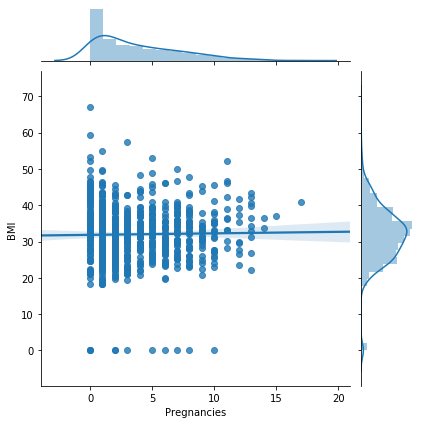

In [5]:
sns.jointplot(x="Pregnancies",y="BMI",data=df,kind="reg")

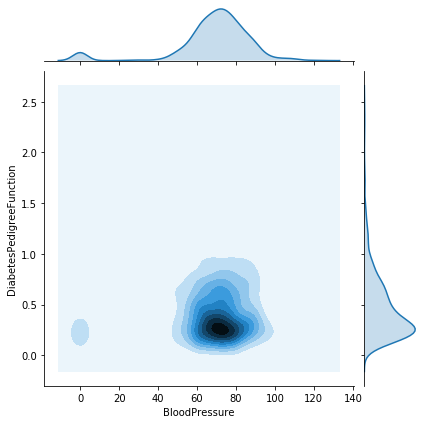

In [6]:
sns.jointplot(x="BloodPressure",y="DiabetesPedigreeFunction",data=df,kind="kde")

In [ ]:
sns.pairplot(df[["Age","Glucose","BloodPressure","BMI"]])

In [33]:
from sklearn.cluster import KMeans
kmn=KMeans(n_clusters=2)

In [34]:
kmn.fit(df.drop(["Outcome","Pregnancies","BloodPressure"],axis=1))
y_test=df["Outcome"]

In [35]:
kmn.cluster_centers_

array([[115.26699834,  17.6185738 ,  32.21227197,  31.17363184,
          0.43757048,  33.11442786],
       [141.46060606,  31.2       , 253.70909091,  34.98545455,
          0.59724848,  33.7030303 ]])

In [36]:
kmn.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,kmn.labels_))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       500
           1       0.52      0.32      0.40       268

    accuracy                           0.66       768
   macro avg       0.61      0.58      0.58       768
weighted avg       0.64      0.66      0.64       768



In [39]:
print(confusion_matrix(y_test,kmn.labels_))

[[421  79]
 [182  86]]
